Head : 
   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.0000

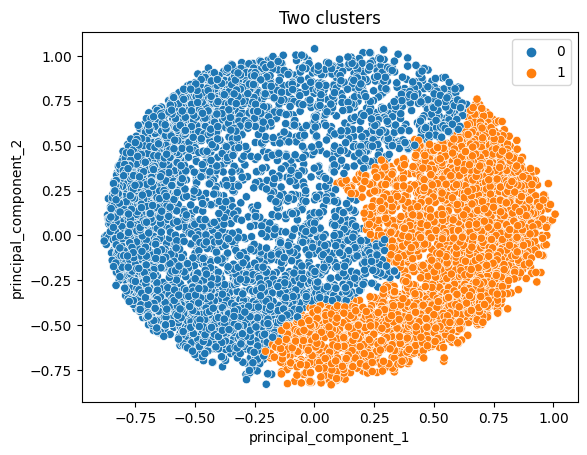

Silhoeutte score on PCA result : 0.4543349042712587
Labels:  [1 2 0 ... 0 1 1]


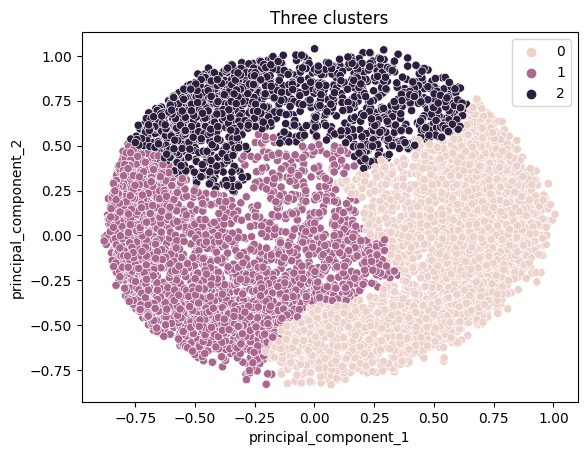

Silhoeutte score on PCA result : 0.46718313004958717
Labels:  [0 2 1 ... 3 0 0]


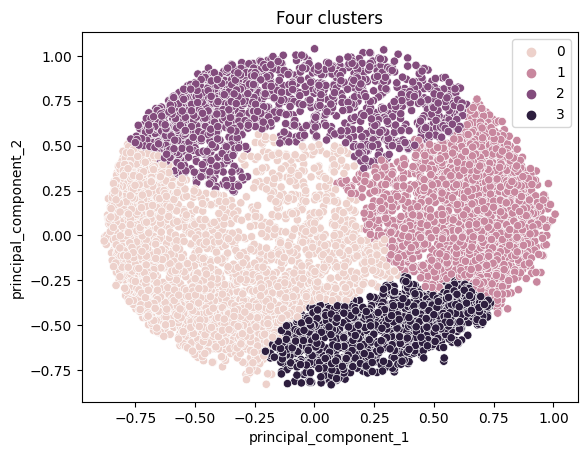

Silhoeutte score on PCA result : 0.4377826151910606
Labels:  [2 0 1 ... 3 2 2]


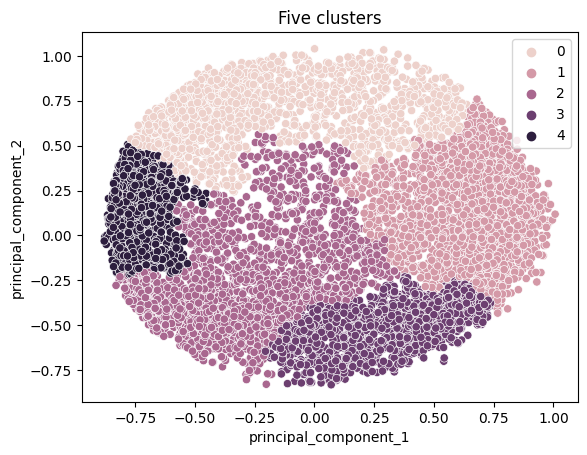

Silhoeutte score on PCA result : 0.41557417028016364


In [44]:
# question 2
import pandas as pd 
from sklearn.decomposition import PCA
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn import metrics

dataset = pd.read_csv('CC GENERAL.csv')
print("Head : \n", df.head())

# data preprocessing
print('dataset info', dataset.info())
print('null values' , dataset.isnull().sum())
print('mean for all columns', dataset.describe())

# removing categorical column
dataset.drop("CUST_ID",axis=1,inplace=True)

# replacing null values with their column mean
dataset["CREDIT_LIMIT"].fillna(dataset["CREDIT_LIMIT"].mean(),inplace=True)
dataset["MINIMUM_PAYMENTS"].fillna(dataset["MINIMUM_PAYMENTS"].mean(),inplace=True)

print(dataset.isnull().sum(),'checking info')

x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_modified_array = scaler.transform(x)
print(X_modified_array)
X_Scaled = pd.DataFrame(X_modified_array, columns = x.columns)
normalizer = preprocessing.normalize(X_modified_array)
X_normalized = pd.DataFrame(normalizer, columns = x.columns)
print(normalizer)

#PCA
pca = PCA(2)
df_pca = pca.fit_transform(X_normalized)
df2 = pd.DataFrame(data=df_pca, columns = ['principal_component_1', 'principal_component_2' ])
final_df = pd.concat([df2,dataset[['TENURE']]],axis=1)
print(final_df.head())

import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
# 2 clusters
hierarchical_cluster_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster_2.fit_predict(df_pca)
print("Labels: ", labels)
sn.scatterplot(data=final_df, x='principal_component_1', y='principal_component_2', hue=labels).set_title('Two clusters')
plt.show()

km = KMeans(n_clusters=2)
km.fit(df_pca)
y_cluster_kmeans = km.predict(df_pca)
silhoeutte_score = metrics.silhouette_score(df_pca, y_cluster_kmeans)
print("Silhoeutte score on PCA result :", silhoeutte_score)


# 3 clusters
hierarchical_cluster_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster_3.fit_predict(df_pca)
print("Labels: ", labels)
sn.scatterplot(data=final_df, x='principal_component_1', y='principal_component_2', hue=labels).set_title('Three clusters')
plt.show()

km = KMeans(n_clusters=3)
km.fit(df_pca)
y_cluster_kmeans = km.predict(df_pca)
silhoeutte_score = metrics.silhouette_score(df_pca, y_cluster_kmeans)
print("Silhoeutte score on PCA result :", silhoeutte_score)

# 4 clusters
hierarchical_cluster_4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster_4.fit_predict(df_pca)
print("Labels: ", labels)
sn.scatterplot(data=final_df, x='principal_component_1', y='principal_component_2', hue=labels).set_title('Four clusters')
plt.show()

km = KMeans(n_clusters=4)
km.fit(df_pca)
y_cluster_kmeans = km.predict(df_pca)
silhoeutte_score = metrics.silhouette_score(df_pca, y_cluster_kmeans)
print("Silhoeutte score on PCA result :", silhoeutte_score)

# 5 clusters
hierarchical_cluster_5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster_5.fit_predict(df_pca)
print("Labels: ", labels)
sn.scatterplot(data=final_df, x='principal_component_1', y='principal_component_2', hue=labels).set_title('Five clusters')
plt.show()

km = KMeans(n_clusters=5)
km.fit(df_pca)
y_cluster_kmeans = km.predict(df_pca)
silhoeutte_score = metrics.silhouette_score(df_pca, y_cluster_kmeans)
print("Silhoeutte score on PCA result :", silhoeutte_score)
